In [43]:
from all_functions import *
from sklearn.metrics import mean_absolute_percentage_error as mape
from aeon.visualisation import plot_series
import pywt
from scipy import signal
from pyts.image import MarkovTransitionField
from pyts.image import GramianAngularField
from pyts.image import RecurrencePlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV, HuberRegressor, Lasso, LassoLarsCV
from aeon.transformations.collection.convolution_based import (
    MiniRocket,
    Rocket,
    MiniRocketMultivariateVariable,
)
import warnings

def rolling_window_image2(series, window, representation, wavelet, level):
  data = []
  for i in range(len(series)-window):
    example = np.array(series[i:i+window+1])
    target = example[-1]

    features = np.delete(example, -1)
    features_norm = znorm(features)
    
    target_norm = znorm_by(target, features)

    rep_features = transform_series(features_norm, representation, wavelet, level)
    feat_target = np.concatenate((rep_features.flatten(), [target_norm]))
    data.append(feat_target)
  df = pd.DataFrame(data)
  return df

In [50]:
pywt.wavelist(kind="continuous")


['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [53]:
wavelet = "db4"
level = 4
data = rolling_window_image(pd.concat([train_tf, pd.Series([0,0,0,0,0,0,0,0,0,0,0,0], index=test.index)]), window, representation, wavelet, level)
X_train, X_test, y_train, _ = train_test_split(data, horizon)
rg = RidgeCV(alphas=np.logspace(-3, 3, 10))
rg.fit(X_train, y_train)
    
predictions = recursive_multistep_forecasting(X_test, rg, horizon)
preds = pd.Series(predictions, index=test.index)
preds_morl = reverse_regressors(train, preds, format=transform)

ValueError: Complex data not supported
                   0                   1                   2     \
0   -0.009832-0.088623j  0.003308+0.080967j -0.020072+0.159234j   
1    0.013942-0.021630j -0.010415-0.008864j -0.014227+0.027535j   
2   -0.006357-0.053248j -0.009924-0.045051j  0.007370+0.023491j   
3   -0.014682+0.006601j  0.002550+0.106855j  0.001816+0.079608j   
4    0.006572+0.064547j  0.006067+0.010069j -0.004268+0.001123j   
..                  ...                 ...                 ...   
357 -0.033752+0.027803j  0.002201+0.281793j  0.017911+0.186453j   
358  0.008780+0.221805j  0.025403+0.078927j  0.006014-0.150762j   
359  0.023079+0.105795j  0.003541-0.108587j -0.014893-0.078986j   
360 -0.005704-0.013327j -0.025905+0.082293j  0.004036+0.231111j   
361 -0.027845+0.102217j  0.001139+0.266216j  0.026379+0.195882j   

                   3                   4                   5     \
0    0.007351+0.078403j  0.025830-0.015686j -0.014274-0.007173j   
1    0.016132+0.045800j -0.003609+0.027779j -0.005586+0.036373j   
2   -0.008356+0.053537j -0.000908+0.051183j -0.000080+0.040168j   
3    0.004358+0.022731j -0.005474+0.024554j  0.025468-0.019137j   
4   -0.010033+0.049339j  0.030324-0.005664j  0.015340-0.207786j   
..                  ...                 ...                 ...   
357  0.019309-0.112425j -0.012509-0.127721j -0.024819+0.156888j   
358 -0.020094-0.091825j -0.018110+0.182985j  0.013368+0.237305j   
359 -0.015457+0.168559j  0.010640+0.229619j  0.030016-0.034461j   
360  0.021972+0.186356j  0.021114-0.069085j  0.008079-0.269783j   
361  0.023375-0.081539j  0.005276-0.272523j -0.006954-0.188195j   

                   6                   7                   8     \
0   -0.011976+0.068918j  0.005254+0.074795j  0.033920-0.048771j   
1   -0.002980+0.054728j  0.031538-0.025505j  0.010179-0.208749j   
2    0.028451-0.036198j  0.008326-0.200570j -0.010659-0.260049j   
3    0.012409-0.190944j -0.008530-0.274998j -0.025519-0.067805j   
4   -0.012007-0.287908j -0.027702-0.058022j -0.023824+0.218428j   
..                  ...                 ...                 ...   
357  0.008579+0.254546j  0.036094-0.026535j  0.014479-0.301057j   
358  0.031612-0.043271j  0.011759-0.291669j -0.013614-0.203990j   
359  0.013828-0.286351j -0.012502-0.210745j -0.025564-0.003790j   
360 -0.005312-0.200747j -0.022689-0.028897j -0.015662+0.005340j   
361 -0.020324-0.022242j -0.014198-0.000736j  0.013993-0.011544j   

                   9     ...                1286                1287  \
0    0.002963-0.212903j  ... -0.079920+0.815368j -0.563590+0.455879j   
1   -0.013316-0.264686j  ... -0.547074+0.731909j -0.510715+0.087241j   
2   -0.022110-0.058204j  ... -0.492736+0.205827j -0.650356+1.111979j   
3   -0.026253+0.208412j  ... -0.691075+0.855175j -1.076674+0.300229j   
4    0.023890+0.244884j  ... -1.061804+0.478136j -0.543739-0.012868j   
..                  ...  ...                 ...                 ...   
357 -0.017557-0.211384j  ...  1.220424+0.143940j  1.389753-0.198415j   
358 -0.023887+0.000814j  ...  1.457208-0.116058j  1.325084-0.001577j   
359 -0.008678+0.022232j  ...  1.309730-0.146517j  0.956258+0.448527j   
360  0.015925-0.006965j  ...  0.956192+0.107000j  1.039443+0.071255j   
361 -0.013355+0.075325j  ...  1.014267+0.217307j  1.313561+0.327789j   

                   1288                1289                1290  \
0   -0.459335-0.212780j -0.525497+0.708133j -0.993451+0.372401j   
1   -0.635574+0.971123j -1.024778+0.334685j -0.590850+0.118676j   
2   -1.070546+0.443000j -0.589549+0.111454j -0.977007-0.257770j   
3   -0.533072-0.135553j -0.939255-0.373078j -0.988115+0.071024j   
4   -0.992406-0.217473j -1.016591+0.119584j -0.356012-0.298951j   
..                  ...                 ...                 ...   
357  1.305312-0.193125j  0.961033+0.442540j  0.855467+0.561589j   
358  0.952404+0.522684j  0.930341+0.476196j  1.135456+0.760352j   
359  0.965508+0.342408j  1.165363+0.696655j  0.841281+0.543980j   
360  1.332862+0.404869j  0.918373+0.504662j  0.658312+0.778625j   
361  0.876880+0.642569j  0.548553+0.961723j  1.084667+0.945953j   

                   1291                1292                1293  \
0   -0.407611-0.128424j -0.704812-0.463102j -0.960014+0.143413j   
1   -0.903701-0.357547j -0.961059+0.117663j -0.462423-0.203185j   
2   -1.045045+0.191051j -0.455641-0.208672j -0.668338-0.419755j   
3   -0.294803-0.396715j -0.580391-0.503078j -0.934990-0.375189j   
4   -0.694117-0.391552j -0.982817-0.344264j -0.514223-0.744464j   
..                  ...                 ...                 ...   
357  1.202671+0.587470j  0.836461+0.553892j  0.295865+1.092377j   
358  0.805622+0.605222j  0.398842+1.057214j  0.734589+1.230872j   
359  0.489221+0.957853j  0.790997+1.187733j  0.536649+1.060413j   
360  1.068483+1.019941j  0.625096+1.071353j  0.491241+0.916396j   
361  0.518332+1.174612j  0.301233+1.029489j  0.162387+0.957821j   

                   1294                1295  
0   -0.276961-0.299200j -0.296340-0.513837j  
1   -0.575791-0.469403j -1.029131-0.285725j  
2   -1.146778-0.255138j -0.483787-0.762249j  
3   -0.370380-0.814103j  0.026945-0.524607j  
4   -0.073040-0.494784j -0.461503-0.998919j  
..                  ...                 ...  
357  0.758815+1.154589j  0.561068+1.046985j  
358  0.414196+1.121592j  0.128355+1.040869j  
359  0.188899+1.019876j  0.079979+0.944193j  
360  0.322156+0.922050j  0.124730+1.290447j  
361  0.180245+1.253197j -0.299314+0.978220j  

[362 rows x 1296 columns]


In [47]:
wavelet = "db5"
level = 4
data = rolling_window_image(pd.concat([train_tf, pd.Series([0,0,0,0,0,0,0,0,0,0,0,0], index=test.index)]), window, representation, wavelet, level)
X_train, X_test, y_train, _ = train_test_split(data, horizon)
rg = RidgeCV(alphas=np.logspace(-3, 3, 10))
rg.fit(X_train, y_train)
    
predictions = recursive_multistep_forecasting(X_test, rg, horizon)
preds = pd.Series(predictions, index=test.index)
preds_mexh = reverse_regressors(train, preds, format=transform)

In [48]:
# data = rolling_window_image(pd.concat([train_tf, pd.Series([0,0,0,0,0,0,0,0,0,0,0,0], index=test.index)]), window, representation)
# X_train, X_test, y_train, _ = train_test_split(data, horizon)

# minirocket = Rocket(num_kernels=1000)  # by default, MiniRocket uses ~10_000 kernels
# minirocket.fit(X_train)

# X_train_transform = minirocket.transform(X_train)

# # classifier = RidgeCV(alphas=np.logspace(-3, 3, 10))
# classifier = RandomForestRegressor()
# classifier.fit(pd.DataFrame(X_train_transform), y_train)

# X_test_transform = minirocket.transform(X_test)

# predictions = recursive_multistep_rocket(X_test, minirocket, classifier, horizon)
# preds = pd.Series(predictions, index=test.index)
# preds_rocket = reverse_regressors(train, preds, format=transform)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='m3'>)

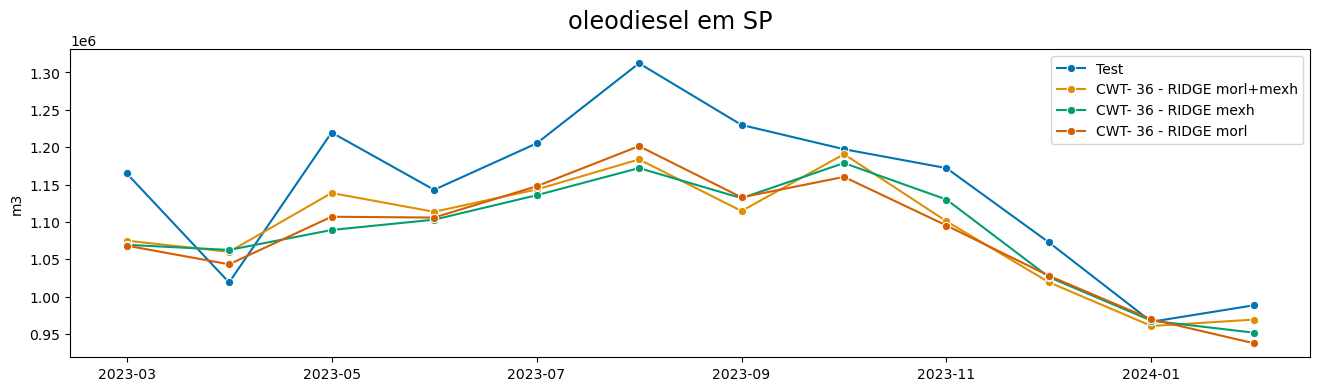

In [49]:
# plot_series(test, preds_deseasonal, preds_rf,preds_rocket, labels=["Test", "CWT- 36 - RIDGE","CWT- 36 - RF", "CWT - 36 - ROCKET - RIDGE"], title=f"{derivado} em {estado}")
plot_series(test,
             preds_deseasonal, 
            preds_mexh,
            preds_morl,
            labels=["Test", "CWT- 36 - RIDGE morl+mexh",
                "CWT- 36 - RIDGE mexh",
                "CWT- 36 - RIDGE morl"
                    ], 
                    title=f"{derivado} em {estado}")